<a href="https://colab.research.google.com/github/maurimendiluce/Clases-Mate2/blob/main/Sistema_de_Ecuaciones_no_lineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sistema de Ecuaciones no lineales**

Consideremos un sistema de ecuaciones, con 2 ecuaciones y 2 incógnitas
\begin{align}
f_1(x,y)&=0\\
f_2(x,y)&=0
\end{align}
Igual que en el caso de una variable, se puede transforma el sistema de ecuaciones en un problema de punto fijo $\textbf{x}=\phi(\textbf{x})$ con $\phi:\mathbb{R}^2→\mathbb{R}^2$. Igual que en el caso escalar, podemos plantear un método iterativo  $\textbf{x}_{n+1}=\phi(\textbf{x}_n)$.

**Ejemplo:** Dado el siguiente sistema de ecuación, planetar un método de punto fijo para aproximar alguna solución. 

\begin{cases}
    \frac{1}{1+y^2} - x = 0 \\
    x - y = 0 \\
\end{cases}

Definimos: 
$$F(x,y) = \begin{pmatrix}
f_1(x,y)  \\
f_2(x,y)
\end{pmatrix}=
\begin{pmatrix}
\frac{1}{1+y^2} \\
x
\end{pmatrix}
$$
entonces el algoritmo de punto fijo nos queda determinado por

$$\begin{pmatrix}
x_{n+1} \\
y_{n+1}
\end{pmatrix}=
F(x_{n},y_{n})$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def F(x,y):
  ret_val = np.array( [1/(1+y**2), x ] )
  return ret_val

In [ ]:
def puntoFijo(F,v0,tol,Nmax):
  v1=F(v0[0] , v0[1])
  n=0
  while(np.linalg.norm( v0 - v1 )>tol and n<Nmax):
    v0=v1
    v1=F(v0[0],v0[1])
    n=n+1
  return(v1)

In [ ]:
v0=np.array([0,0.5])
v=puntoFijo(F,v0,0.00001,50)
print("v:",v)
print("F(v):",F(v[0],v[1]))

v: [0.68232644 0.68233312]
F(v): [0.68232443 0.68232644]


Algo similar podemos hacer con el método de **Newton**: $$\textbf{x}_{n+1}=\textbf{x}_n-J^{-1}(\textbf{x}_n)F(\textbf{x}_n),$$ donde $J(\textbf{x})$ es la matriz Jacobiana o matriz diferencial.

**Ejemplo:** Dado el siguiente sistema de ecuaciones, planetar un método de Newton para aproximar alguna solución. 

\begin{cases}
    x^2 + 2y^2 - 10 = 0 \\
    x - e^{-2y} = 0 \\
\end{cases}

Definimos:

$$
F(x,y) = \begin{pmatrix}
f_1(x,y)  \\
f_2(x,y) 
\end{pmatrix} = 
\begin{pmatrix}
x^2 + 2y^2 - 10  \\
x - e^{-2y} 
\end{pmatrix}.
$$

Calculamos la matriz diferencial $J$

$$
\begin{pmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y} 
\end{pmatrix}
=
\begin{pmatrix}
2x & 4y \\
1 & 2e^{-2y} 
\end{pmatrix} = J(x,y)
$$

In [ ]:
def F2(x,y):
  ret_val = np.array( [x**2 + 2*y**2 - 10, x - np.exp(-2*y)] )
  return ret_val

def J(x,y):
  ret_val = np.matrix( [[2*x, 4*y], [1, 2*np.exp(-2*y)]] )
  return ret_val

In [ ]:
def Newton(F,J,v0,tol,Nmax):
  v1 = v0 - np.linalg.solve(J(v0[0],v0[1]),F(v0[0],v0[1]))
  n=0
  while(np.linalg.norm(v0-v1)>tol and n<Nmax):
    v0 = v1
    v1 = v0 - np.linalg.solve(J(v0[0],v0[1]),F(v0[0],v0[1])) 
    n = n+1
  print("iteraciones realizadas:",n)
  return(v1)

In [ ]:
v0=np.array([1,2])
v=Newton(F2,J,v0,0.00001,200)
print("v:",v)
print("F2(v)",F2(v[0],v[1]))

iteraciones realizadas: 3
v: [0.01142322 2.23605339]
F2(v) [ 2.61355382e-11 -2.96254341e-13]


## Ejemplo de pizarron

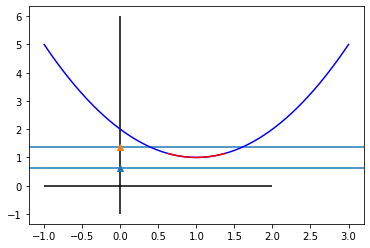

In [ ]:
def g(x):
  return(x**2-2*x+2)

x=np.linspace(-1,3,1001)
t=np.linspace(5/8,11/8,1001)
y=np.linspace(0,2,1001)

plt.hlines(y=0, xmin=-1, xmax=2)
plt.vlines(x=0, ymin=-1, ymax=6)
plt.axhline(y=5/8, xmin=-1, xmax=2)
plt.axhline(y=11/8, xmin=-1, xmax=2)
plt.plot(x,g(x),'b')
plt.plot(t,g(t),'r')
a=[0,5/8]
b=[0,11/8]
plt.plot(a[0],a[1],'^')
plt.plot(b[0],b[1],'^')
